<a href="https://colab.research.google.com/github/RaselRahman/CSEKU_SDP_2019_Simple_and_Complex_Calculus_Problem_Solver_Step_by_Step/blob/master/Fire_Vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
!pip install pyyaml h5py  # Required to save models in HDF5 format
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:

physical_devics=tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU:",len(physical_devics))
#tf.config.experimental.set_memory_growth(physical_devics[0],True)

Number of GPU: 1


In [ ]:
#Overfit:10068
#train_path = '//content/drive/My Drive/Thesis_Dataset/Dataset-01/train'
#valid_path = '/content/drive/My Drive/Thesis_Dataset/Dataset-01/valid'
#test_path = '/content/drive/My Drive/Thesis_Dataset/Dataset-01/test'

In [4]:
#path for train,valid,test
#os.chdir('C:/Users/rasel/A 4-2 Term ML/CNN Learning/MY_Model')
train_path='/content/drive/My Drive/Machine Learning All/fire_dataset/train'
valid_path='/content/drive/My Drive/Machine Learning All/fire_dataset/valid'
test_path='/content/drive/My Drive/Machine Learning All/fire_dataset/test'

In [5]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['fire', 'normal'], batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['fire', 'normal'], batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['fire', 'normal'], batch_size=10, shuffle=False)

Found 149 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [6]:
# assert train_batches.n ==149
# assert valid_batches.n ==50
# assert test_batches.n ==61
# assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs,labels = next(train_batches)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
#this function will plot images in the form of a grid with 1 row and 10 column
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

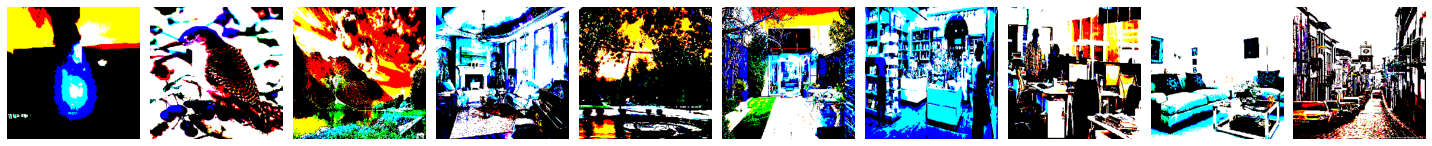

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

# Building Model From scratch

In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

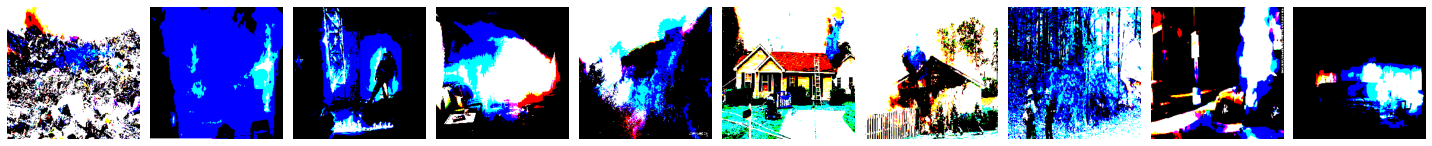

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [11]:
#Prediction
#going to plot test data at first before prediction process
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(labels)


In [12]:
#test_batches=>its a variable which containing test images
#test_batches.classes=>100 test label (According to test samples)
test_batches.classes # to get label of all test images ,its a vector of 1 and 0 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
predictions=model.predict(x=test_batches,verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [14]:
#we create this as we need to pass it in our confusion matrix
rounded_prediction=np.argmax(predictions,axis=-1)
print(rounded_prediction)  # all predicted result 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Confusion Metric

In [ ]:
confusion_matX=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_prediction)


In [ ]:
confusion_matX=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_prediction)

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This Function prints and plots the confusion matrix .
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion Matrix')
    else:
        print('Confusion Matrix Without normalization')
    print(cm)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [ ]:
#to know which label we we in our confusion matrix
test_batches.class_indices

In [ ]:
cm_plot_labels=['Fire','Normal']
plot_confusion_matrix(cm=confusion_matX,classes=cm_plot_labels,title='Confusion Matrix')

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


# Transfer Learning

Download VGG16 Model

In [ ]:
#build fine tuned VGG16 model
vgg16_model = tf.keras.applications.vgg16.VGG16()

Which type of Model is VGG16

In [ ]:
type(vgg16_model)

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False 
model.add(Dense(units=2, activation='softmax'))       

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)

In [ ]:
cm_plot_labels=['Fire','Normal']
plot_confusion_matrix(cm=confusion_matX,classes=cm_plot_labels,title='Confusion Matrix')

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


## Transfer learning using VGG19

In [15]:
#import VGG19
from keras.applications import VGG19
#creating an object of vgg19 model and discarding the top layer
model_vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(rows,cols, channels))
#model_vgg19.summary()

NameError: ignored

In [16]:
vgg19_model = tf.keras.applications.vgg19.VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [19]:
model = Sequential()
for layer in vgg19_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False 
model.add(Dense(units=2, activation='softmax'))       

In [20]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=train_batches,validation_data=valid_batches,epochs=15,verbose=2)

Epoch 1/15
15/15 - 93s - loss: 0.3678 - accuracy: 0.8188 - val_loss: 0.1675 - val_accuracy: 0.9000
Epoch 2/15
15/15 - 3s - loss: 0.0746 - accuracy: 0.9732 - val_loss: 0.1088 - val_accuracy: 0.9400
Epoch 3/15
15/15 - 3s - loss: 0.0223 - accuracy: 0.9866 - val_loss: 0.1326 - val_accuracy: 0.9400
Epoch 4/15
15/15 - 3s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9400
Epoch 5/15
15/15 - 3s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9600
Epoch 6/15
15/15 - 3s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9400
Epoch 7/15
15/15 - 3s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9400
Epoch 8/15
15/15 - 3s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9400
Epoch 9/15
15/15 - 3s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9400
Epoch 10/15
15/15 - 3s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9400
Epoch 11/15
15/15 

In [22]:
confusion_matX=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_prediction)

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This Function prints and plots the confusion matrix .
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion Matrix')
    else:
        print('Confusion Matrix Without normalization')
    print(cm)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

Confusion Matrix Without normalization
[[45  3]
 [13  0]]


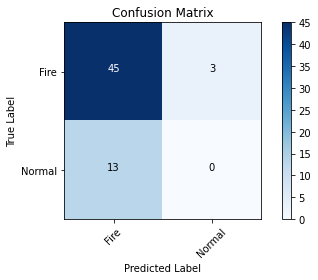

In [23]:
cm_plot_labels=['Fire','Normal']
plot_confusion_matrix(cm=confusion_matX,classes=cm_plot_labels,title='Confusion Matrix')

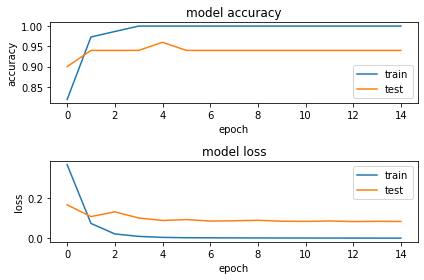

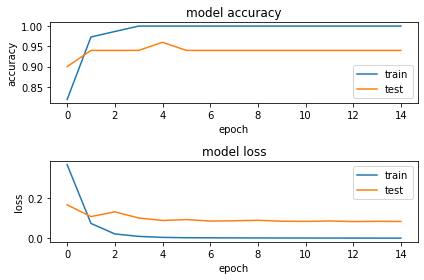

In [24]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


In [ ]:
from google.colab import files
files.download('your typical text file or what ever.txt')

In [ ]:
checkpoint_path = "/content/drive/My Drive/Thesis_Dataset/Dataset-01/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history=model.fit(x=train_batches, 
          validation_data=valid_batches,  
          epochs=10,
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

In [ ]:
#Train vgg16 model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
 history=model.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

In [ ]:
model.save('my_model.h5') 

In [ ]:

test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(labels)



#Prediction going to plot test data at first before prediction process

In [ ]:
#test_batches=>its a variable which containing test images
#test_batches.classes=>100 test label (According to test samples)
test_batches.classes # to get label of all test images ,its a vector of 1 and 0 

In [ ]:
predictions=model.predict(x=test_batches,verbose=0)

#we create this as we need to pass it in our confusion matrix

In [ ]:

rounded_prediction=np.argmax(predictions,axis=-1)
print(rounded_prediction)  # all predicted result 

Confusion Matrics

In [ ]:
confusion_matX=confusion_matrix(y_true=test_batches.classes,y_pred=rounded_prediction)


In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This Function prints and plots the confusion matrix .
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion Matrix')
    else:
        print('Confusion Matrix Without normalization')
    print(cm)
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

In [ ]:
#to know which label we we in our confusion matrix
test_batches.class_indices

In [ ]:
cm_plot_labels=['Fire','Normal']
plot_confusion_matrix(cm=confusion_matX,classes=cm_plot_labels,title='Confusion Matrix')

# Necessary Graphs

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


In [ ]:
!ls {checkpoint_dir}